<a href="https://colab.research.google.com/github/KirtiRanjan26/prediction-dataset/blob/main/IPL_TEAM_WINNER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step-1: Install & Import necessary libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# Load dataset
df = pd.read_csv("matches.csv")
# df.head()
df.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [7]:
# Drop columns that won’t help in prediction
df = df[[
    'team1', 'team2', 'toss_winner', 'toss_decision',
    'venue', 'winner'
]].dropna()

# Filter consistent teams only (to avoid rare/defunct teams)
teams = ['Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore',
         'Kolkata Knight Riders', 'Rajasthan Royals', 'Delhi Capitals',
         'Sunrisers Hyderabad', 'Punjab Kings']

df = df[
    (df['team1'].isin(teams)) &
    (df['team2'].isin(teams)) &
    (df['toss_winner'].isin(teams)) &
    (df['winner'].isin(teams))
]


In [8]:
# Encode teams and venue
le = LabelEncoder()

df['team1'] = le.fit_transform(df['team1'])
df['team2'] = le.fit_transform(df['team2'])
df['toss_winner'] = le.fit_transform(df['toss_winner'])
df['venue'] = le.fit_transform(df['venue'])
df['winner'] = le.fit_transform(df['winner'])

# Encode toss_decision
df['toss_decision'] = df['toss_decision'].map({'bat': 0, 'field': 1})


In [9]:
X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4766355140186916

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.62      0.56        16
           1       0.00      0.00      0.00         5
           2       0.50      0.50      0.50        16
           3       0.58      0.78      0.67        23
           4       0.00      0.00      0.00         5
           5       0.35      0.43      0.39        14
           6       0.56      0.26      0.36        19
           7       0.44      0.44      0.44         9

    accuracy                           0.48       107
   macro avg       0.37      0.38      0.36       107
weighted avg       0.46      0.48      0.45       107



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
def predict_winner(team1, team2, toss_winner, toss_decision, venue):
    input_df = pd.DataFrame({
        'team1': [le.transform([team1])[0]],
        'team2': [le.transform([team2])[0]],
        'toss_winner': [le.transform([toss_winner])[0]],
        'toss_decision': [0 if toss_decision == 'bat' else 1],
        'venue': [le.transform([venue])[0]]
    })

    prediction = model.predict(input_df)
    return le.inverse_transform(prediction)[0]


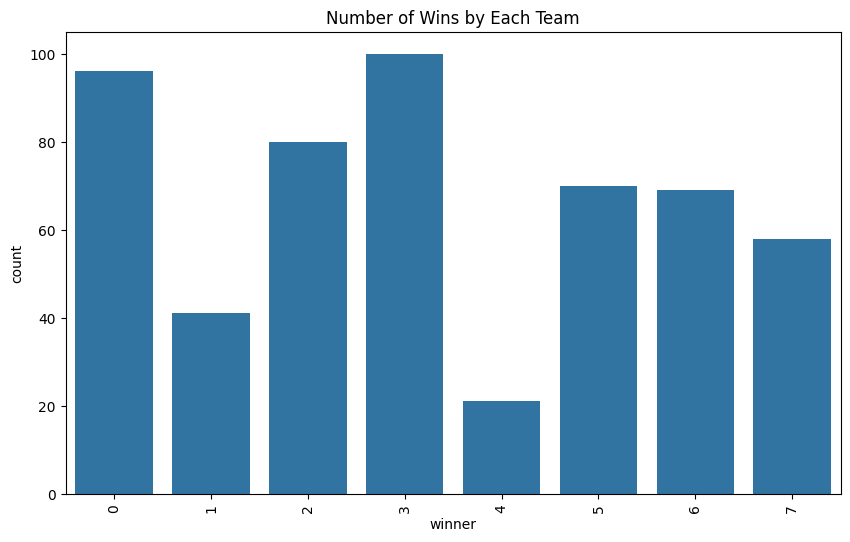

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='winner', data=df)
plt.xticks(rotation=90)
plt.title("Number of Wins by Each Team")
plt.show()
